In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Aim: determine the haplotype of Rht region: YR7-chr2B

# Multiple buffers: Function: sqrt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_target_region(by_windowd_db, chromosome, down_region, up_region, function=None, power_n=2):
    
    if function is not None:
        function_name = function.__name__
    function_name = "None"
    
    in_db = by_windowd_db
    target_region_df = in_db[\
                             (in_db['window'] >= down_region) & \
                             (in_db['window'] <= up_region) & \
                             (in_db['seqname'].str.contains(chromosome))\
                            ]
    header = target_region_df[['seqname','window']]
    df_values = target_region_df.iloc[:, 2:]
    
    if function_name == 'power':
        power_n = power_n        
        np_values = function(df_values, power_n)
        final_df = pd.concat([header, np_values], axis=1)
    
    elif function is not None:
        np_values = function(df_values).replace(-np.inf, 0)
        final_df = pd.concat([header, np_values], axis=1)
    else:
        final_df = target_region_df
        
    return final_df

def sort_by_variation_count(by_windows_db):
    p_table = pd.pivot_table(by_windows_db, values=by_windows_db.columns[2:], index=['window'])
    t_sum = p_table.sum()
    p_table_sorted = p_table[t_sum.sort_values(ascending=True).index]
    return p_table_sorted


def get_culstermap(data, annotate=False):
    if annotate == True:
        out_clustermap = sns.clustermap(data, vmin=0,\
                                        row_cluster = False,\
                                        figsize=(34, 15),\
                                        cbar_pos=(0, .2, .02, .4),\
                                        dendrogram_ratio=(.1, .2),\
                                        annot=True,\
                                        annot_kws={"size": 8, 'rotation': 90})
    else:
        out_clustermap = sns.clustermap(data, vmin=0,\
                                        row_cluster = False,\
                                        figsize=(34, 15),\
                                        cbar_pos=(0, .2, .02, .4),\
                                        dendrogram_ratio=(.1, .2))
        
    return out_clustermap


def drop_references(df, list_of_ref):
    for ref_i in list_of_ref:
        i = df[(df.ref == ref_i)].index
        df = df.drop(i)
    return df


def target_genes(pangenome_gene_file, gene, reference_codes):
    
    synteny_genes = pd.read_csv(pangenome_gene_file, delimiter='\t')
    synteny_genes_ = synteny_genes['chr'].str.split('__', expand=True)[1]
    synteny_genes['ref'] = synteny_genes_.map(reference_codes)
    synteny_genes['chr'] = synteny_genes['chr'].str.split('_', expand=True)[0]
    target_genes_ = synteny_genes[(synteny_genes['srcmodel'].str.contains(gene))]
    return target_genes_

In [3]:
synteny_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/04_haplotype_grouping/09_gene_synteny'
data_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/04_haplotype_grouping/0_data'

In [4]:
reference_codes = {\
'ari': 'Arina',
'jag':'Jagger',
'sta':'Stanley',
'jul':'Julius',
'lac':'Lancer',
'ldm':'Landmark',
'mac':'Mace',
'nor':'Norin61',
'sym':'Mattis',
'chi':'CS',
'tsp':'Spelt',
'ash':'Ashsyn'}

In [5]:
gene_down = 'TraesCS2B02G486000'

down_matched_gene = target_genes(synteny_path+'/pangenome_gene_synteny.tsv', gene_down, reference_codes)
down_matched_gene

# down_matched_genes_rht_D1.to_csv('down_matched_genes_rht1b.tsv', sep='\t', index=False)

,chr,start,end,ID,srcmodel,ref
26758,chr2B,692305496,692310127,TraesARI2B01G526900,TraesCS2B02G486000.1,Arina
147630,chr2B,683067976,683072607,TraesJAG2B01G522700,TraesCS2B02G486000.1,Jagger
266939,chr2B,686918176,686922825,TraesSTA2B01G531400,TraesCS2B02G486000.1,Stanley
386465,chr2B,679412991,679417654,TraesJUL2B01G522500,TraesCS2B02G486000.1,Julius
505140,chr2B,571789343,571794006,TraesLAC2B01G495900,TraesCS2B02G486000.1,Lancer
625568,chr2B,681306054,681310703,TraesLDM2B01G518200,TraesCS2B02G486000.1,Landmark
744461,chr2B,676059339,676063988,TraesMAC2B01G527200,TraesCS2B02G486000.1,Mace
864678,chr2B,685891318,685895949,TraesNOR2B01G529800,TraesCS2B02G486000.1,Norin61
982952,chr2B,683922586,683927235,TraesSYM2B01G522200,TraesCS2B02G486000.1,Mattis
1104648,chr2B,683035392,683040011,TraesCHI2B01G537400,TraesCS2B02G486000,CS


In [6]:
gene_up = 'TraesCS2B02G490200'

up_matched_gene = target_genes(synteny_path+'/pangenome_gene_synteny.tsv', gene_up, reference_codes)
up_matched_gene

,chr,start,end,ID,srcmodel,ref
26811,chr2B,696903621,696905030,TraesARI2B01G532200,TraesCS2B02G490200.1,Arina
147680,chr2B,687696035,687697444,TraesJAG2B01G527700,TraesCS2B02G490200.1,Jagger
266977,chr2B,690175160,690176569,TraesSTA2B01G535200,TraesCS2B02G490200.1,Stanley
386498,chr2B,681664058,681665467,TraesJUL2B01G525800,TraesCS2B02G490200.1,Julius
505171,chr2B,574060851,574062260,TraesLAC2B01G499000,TraesCS2B02G490200.1,Lancer
625605,chr2B,684548664,684550073,TraesLDM2B01G521900,TraesCS2B02G490200.1,Landmark
744499,chr2B,679274332,679275741,TraesMAC2B01G531000,TraesCS2B02G490200.1,Mace
864723,chr2B,690456492,690457901,TraesNOR2B01G534300,TraesCS2B02G490200.1,Norin61
982992,chr2B,687045978,687047387,TraesSYM2B01G526200,TraesCS2B02G490200.1,Mattis
1104696,chr2B,687634061,687635470,TraesCHI2B01G542200,TraesCS2B02G490200,CS


In [10]:
window = 100000
# buffer = 600000

function = np.sqrt
power_n = 0.43

if function is None:
    function_name = "None"
else:
    function_name = function.__name__

# remove references from the analysis
list_of_ref = ['Ashsyn','CS']    
down_matched_gene = drop_references(down_matched_gene, list_of_ref)
# up_matched_gene = drop_references(up_matched_gene, list_of_ref)

references = down_matched_gene['ref'].to_list()

# drop query_samples
list_of_query = ['WATDE0039', 'Santiago-pr','Claire-skm','Mattis']

In [11]:
references

['Arina',
 'Jagger',
 'Stanley',
 'Julius',
 'Lancer',
 'Landmark',
 'Mace',
 'Norin61',
 'Mattis',
 'Spelt']

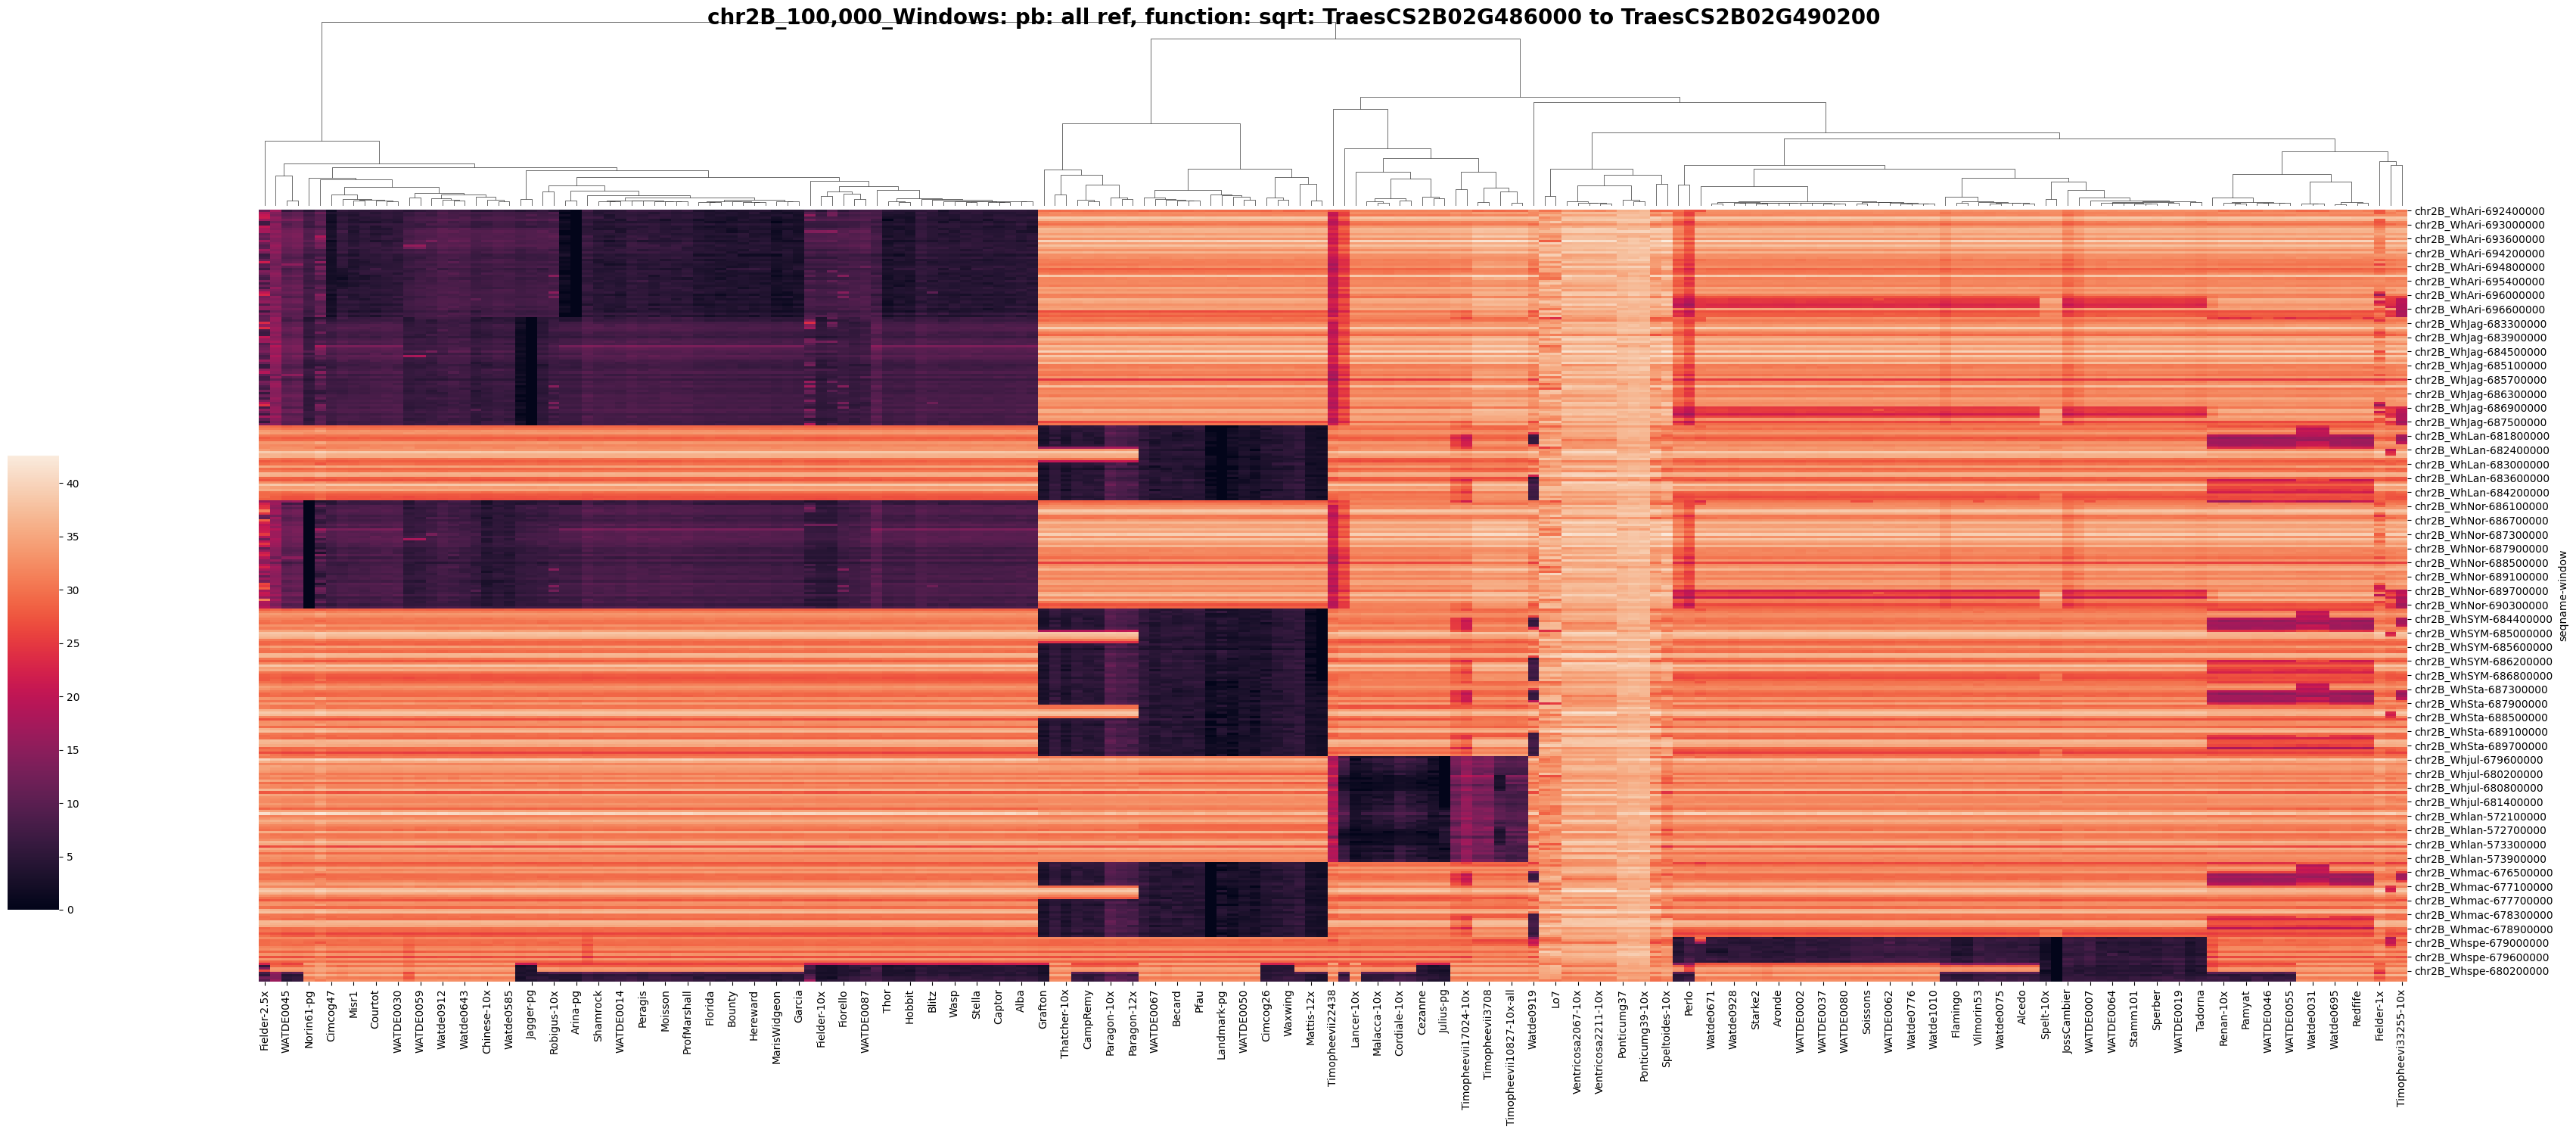

In [8]:
buffers = [0]

for buffer in buffers:
    dfs = []
    for reference in references:

        down_gene_position = int(down_matched_gene[down_matched_gene['ref'] == reference]['start'].values)
        down_chromosome = down_matched_gene[down_matched_gene['ref'] == reference]['chr'].values[0]
        down_region = down_gene_position - buffer
        
        up_gene_position = int(up_matched_gene[up_matched_gene['ref'] == reference]['end'].values)
        up_chromosome = up_matched_gene[up_matched_gene['ref'] == reference]['chr'].values[0]
        up_region = up_gene_position + buffer

        file_db = pd.read_csv(f'{data_path}/{reference}_vs_all_variations_{window}_windows.tsv', delimiter='\t')

        # drop outlier samples
        file_db = file_db.drop(list_of_query, axis=1, errors='ignore')

        # find and extract gene region
        get_target_region_ = get_target_region(file_db, down_chromosome, down_region, up_region, function, power_n)

        dfs.append(get_target_region_)

    dfs_concat = pd.concat(dfs, join="inner")
    
    buffer = f'{gene_down} to {gene_up}'
    heatmap_data = pd.pivot_table(dfs_concat, values=dfs_concat.columns, index=['seqname', 'window'])
#     get_culstermap_plot = get_culstermap(heatmap_data,False)
    get_culstermap_ = get_culstermap(heatmap_data, False).fig.suptitle(f'{down_chromosome}_{window:,}_Windows: pb: all ref, function: {function_name}: {buffer}', fontsize=20, va="baseline", weight="bold")
# plt.savefig(f'clustermap_all_references_sqrt.jpg', dpi=150, bbox_inches='tight')


In [9]:
def get_culstermap(data, annotate=False):
    if annotate == True:
        out_clustermap = sns.clustermap(data, vmin=0,\
                                        row_cluster = False,\
                                        figsize=(30, 18),\
                                        cbar_pos=(0, .2, .02, .4),\
                                        dendrogram_ratio=(.1, .2),\
                                        annot=True,\
                                        annot_kws={"size": 8, 'rotation': 90})
    else:
        out_clustermap = sns.clustermap(data, vmin=0,\
                                        row_cluster = False,\
                                        figsize=(30, 18),\
                                        cbar_pos=(0, .2, .02, .4),\
                                        dendrogram_ratio=(.1, .2))
        
    return out_clustermap

# Full genome

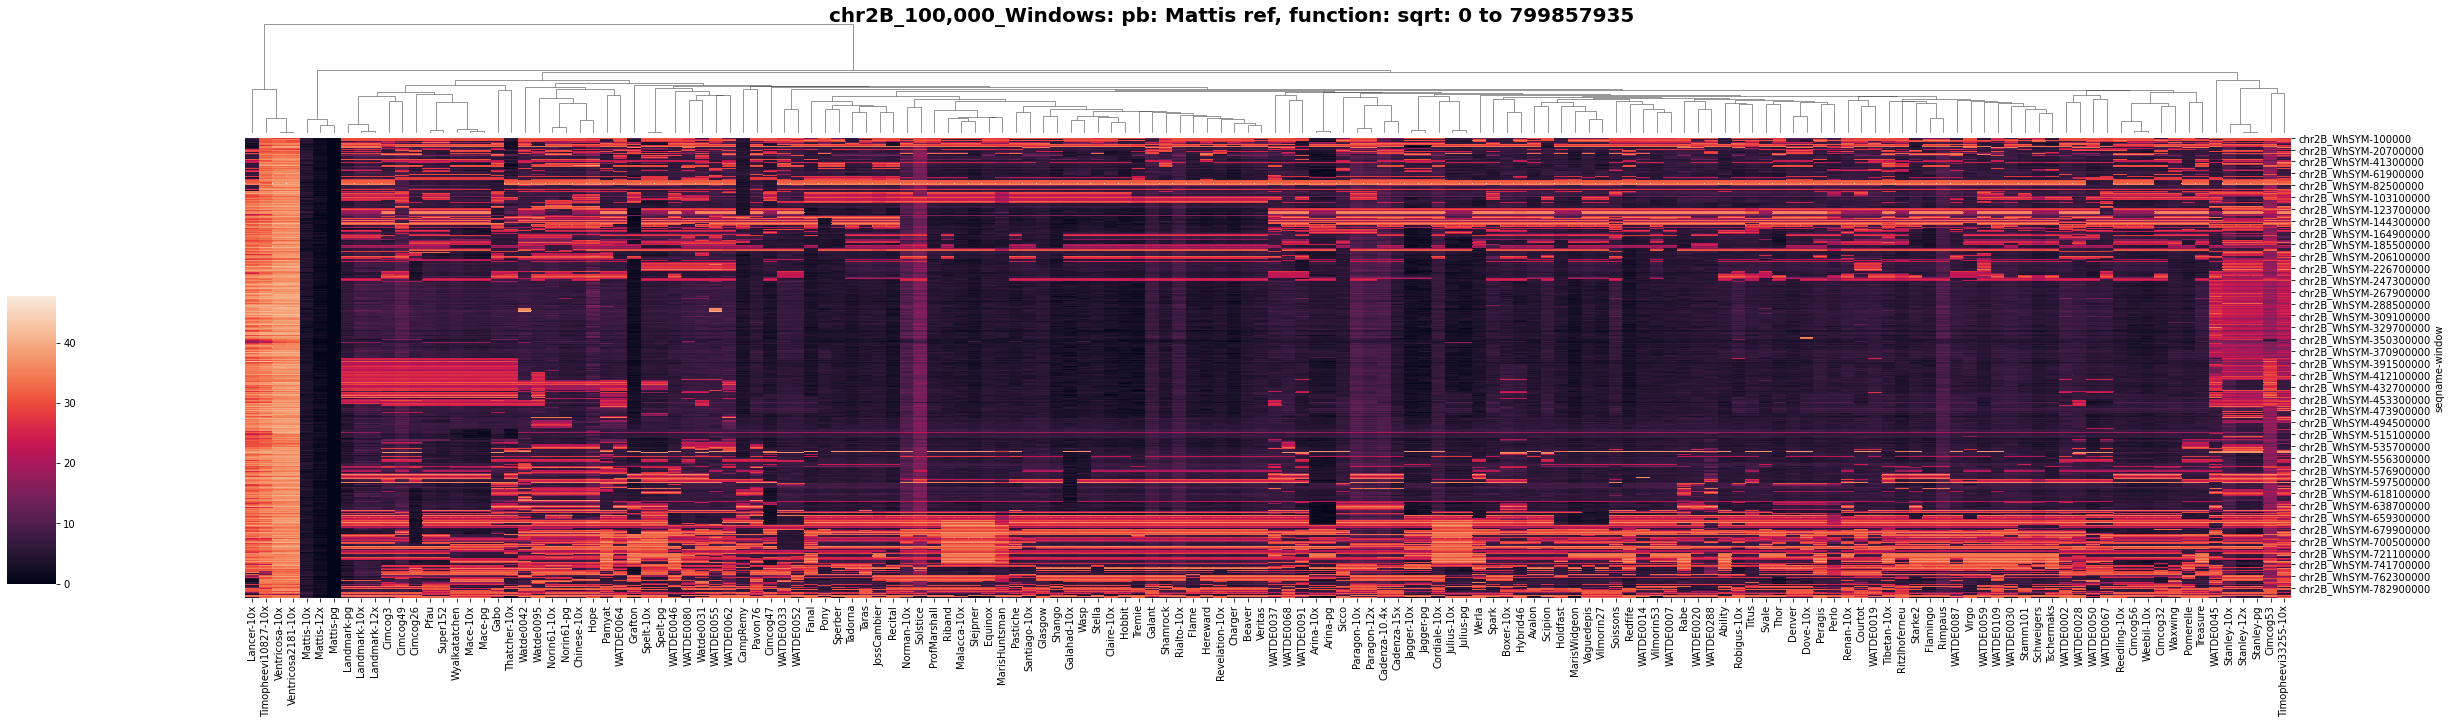

In [28]:
buffers = [0]

references = ['Mattis']

for buffer in buffers:
    dfs = []
    for reference in references:

#         down_gene_position = int(down_matched_gene[down_matched_gene['ref'] == reference]['start'].values)
#         down_chromosome = down_matched_gene[down_matched_gene['ref'] == reference]['chr'].values[0]
        down_region = 0
        
        up_gene_position = int(up_matched_gene[up_matched_gene['ref'] == reference]['end'].values)
        up_chromosome = up_matched_gene[up_matched_gene['ref'] == reference]['chr'].values[0]
        up_region = 799857935

        file_db = pd.read_csv(f'{data_path}/{reference}_vs_all_variations_{window}_windows.tsv', delimiter='\t')

        # drop outlier samples
        file_db = file_db.drop(list_of_query, axis=1, errors='ignore')

        # find and extract gene region
        get_target_region_ = get_target_region(file_db, down_chromosome, down_region, up_region, function, power_n)

        dfs.append(get_target_region_)

    dfs_concat = pd.concat(dfs, join="inner")
    
    buffer = f'0 to 799857935'
    heatmap_data = pd.pivot_table(dfs_concat, values=dfs_concat.columns, index=['seqname', 'window'])
#     get_culstermap_plot = get_culstermap(heatmap_data,False)
    get_culstermap_ = get_culstermap(heatmap_data, False).fig.suptitle(f'{down_chromosome}_{window:,}_Windows: pb: Mattis ref, function: {function_name}: {buffer}', fontsize=20, va="baseline", weight="bold")
# plt.savefig(f'clustermap_all_references_sqrt_chr2B_full.jpg', dpi=150, bbox_inches='tight')

In [19]:
all_samples = pd.DataFrame(dfs_concat.columns)
all_samples.to_csv('all_samples.tsv', sep='\t', index=False)

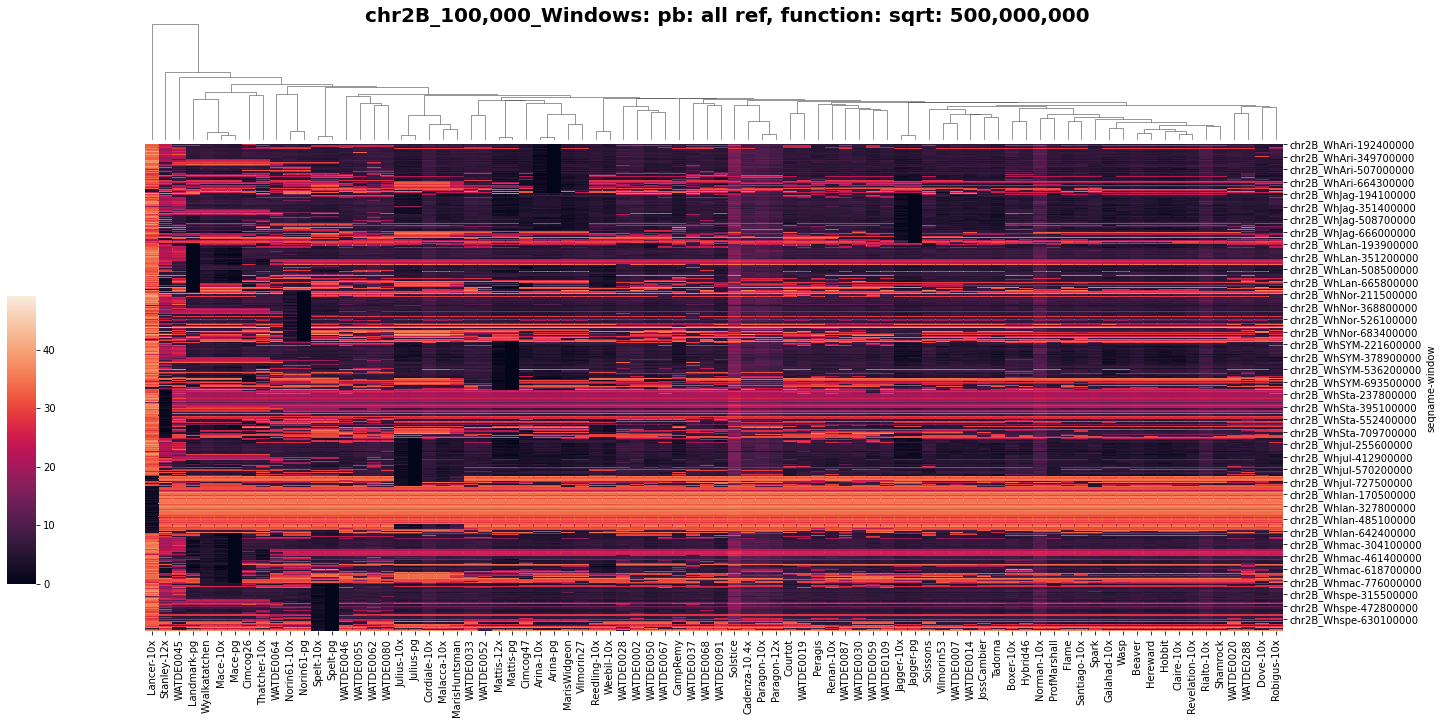

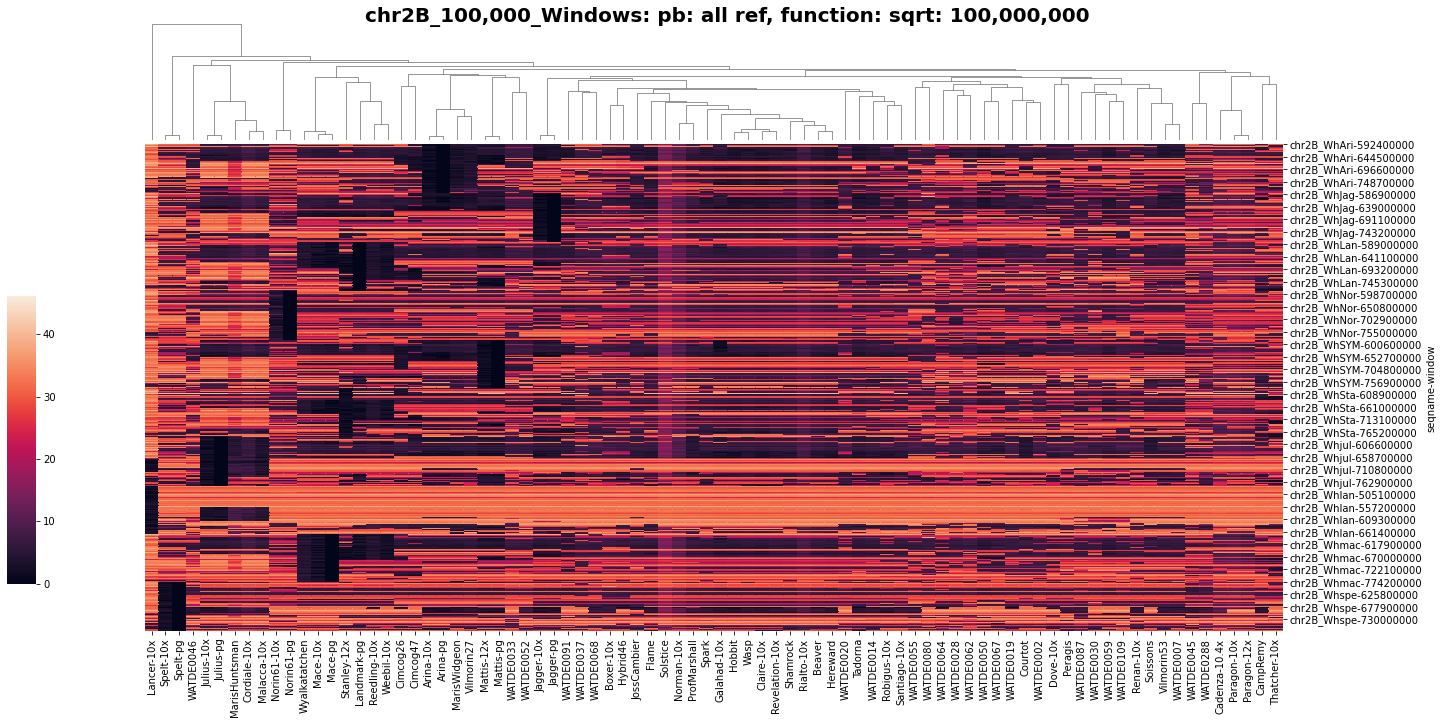

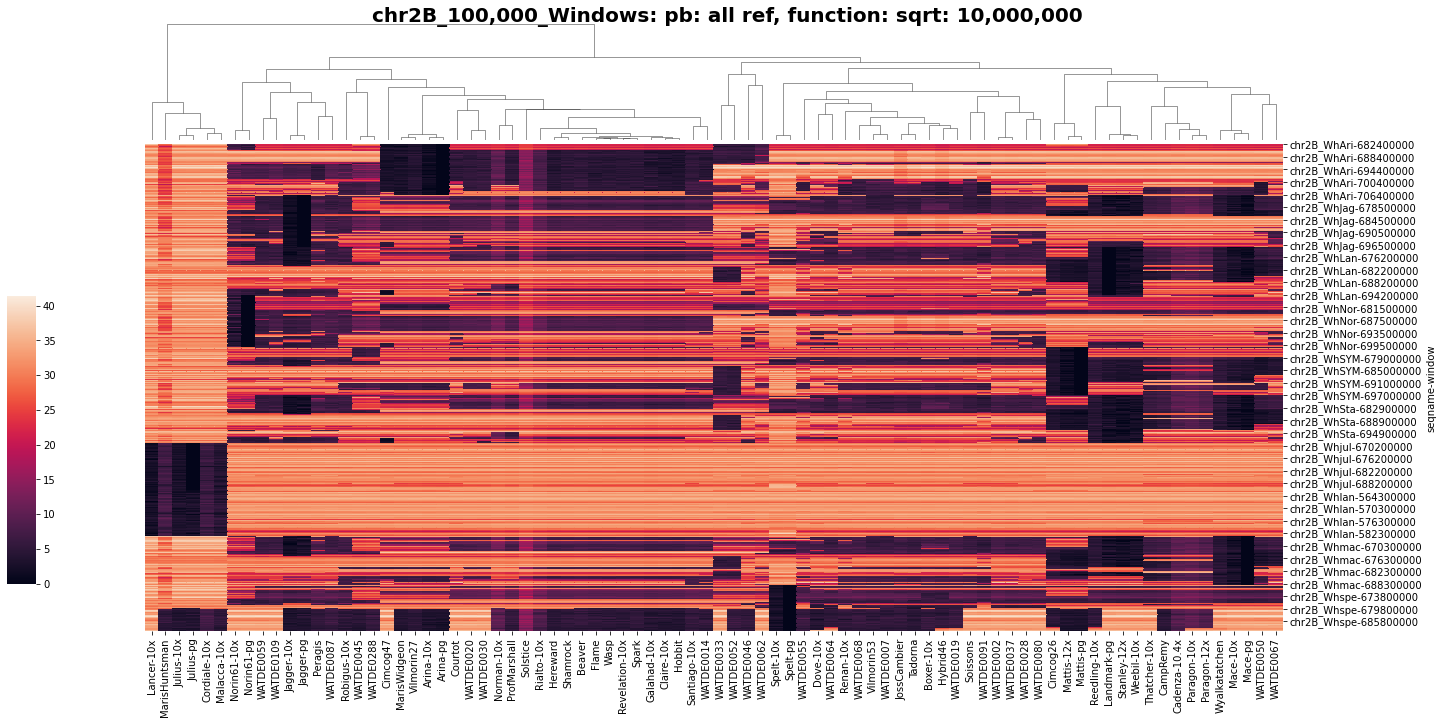

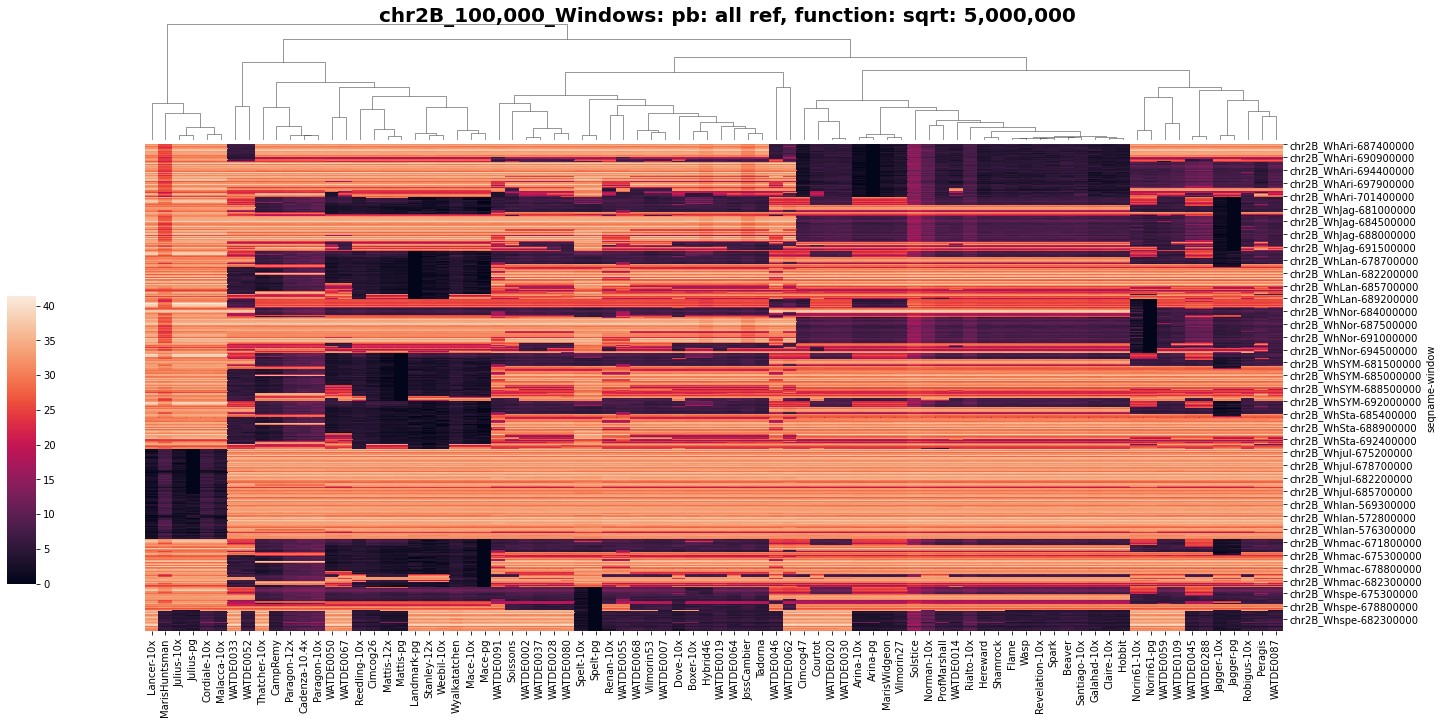

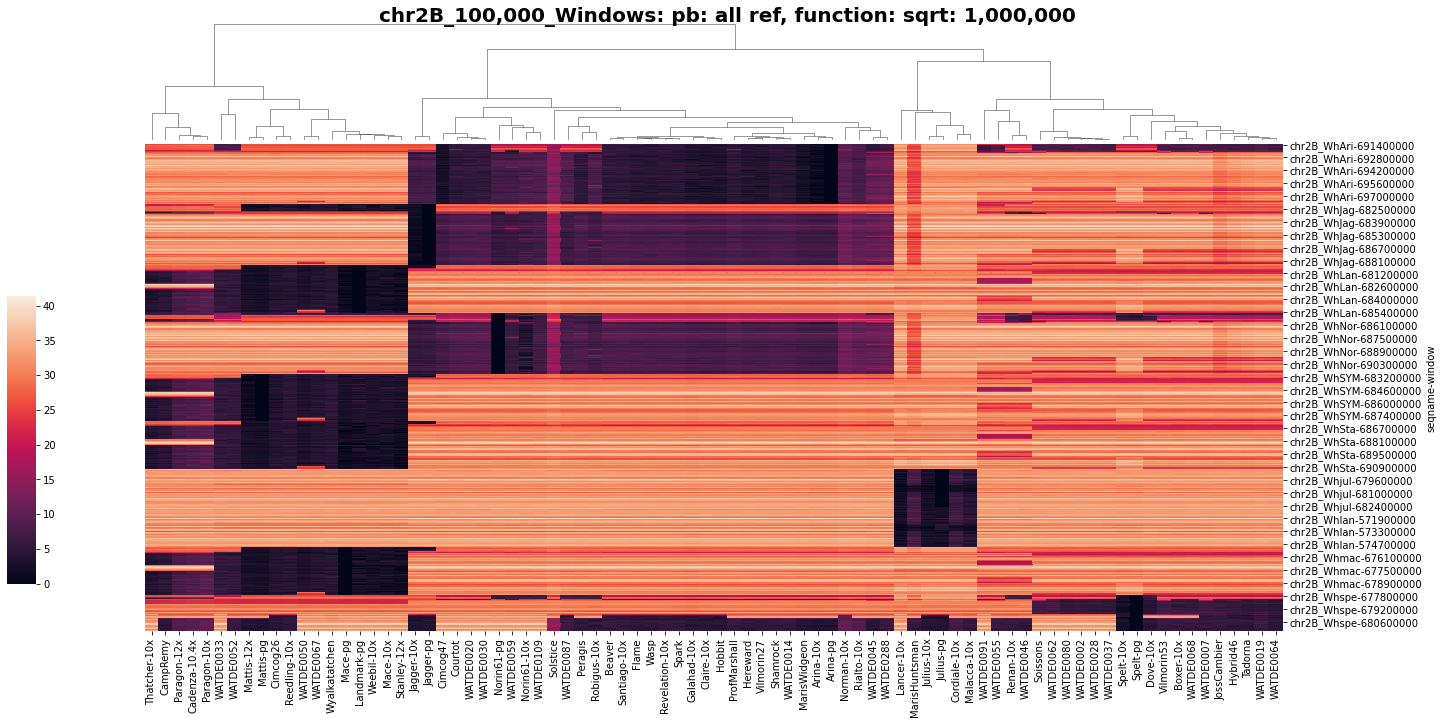

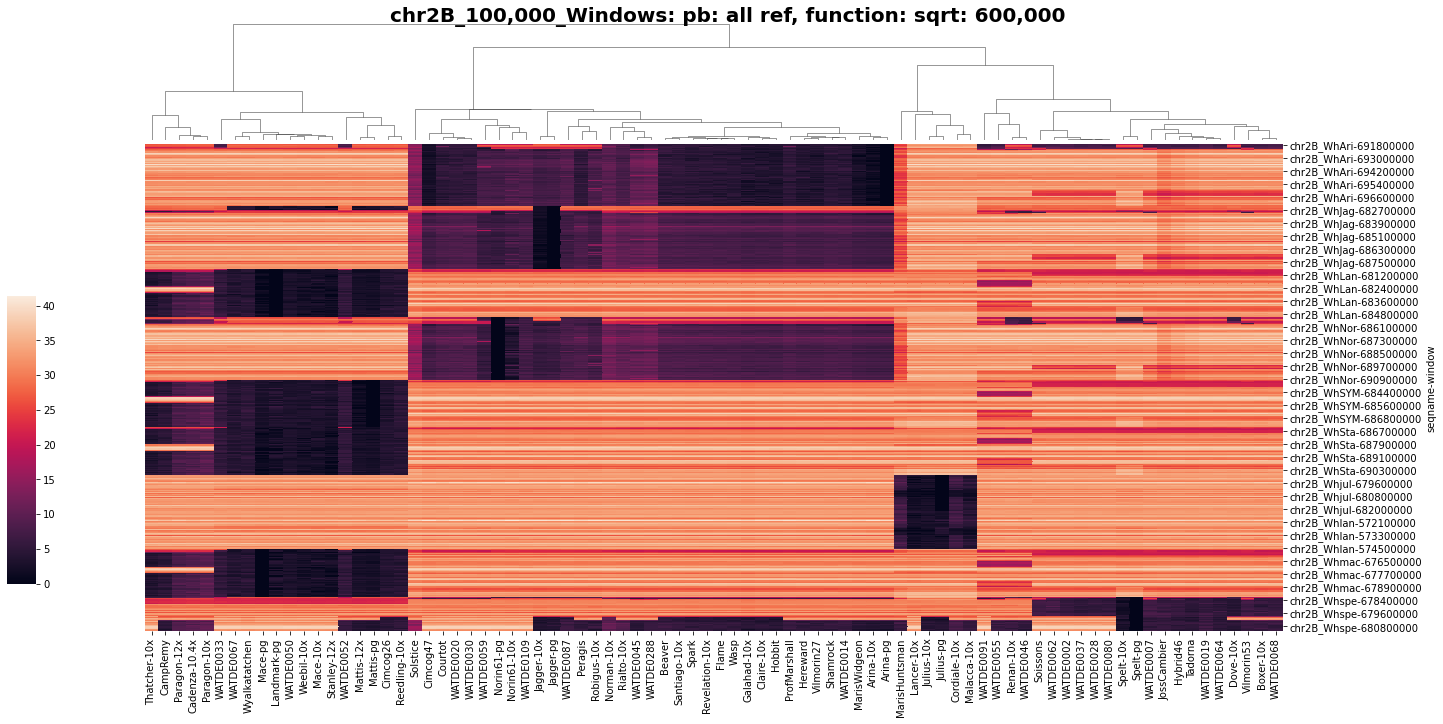

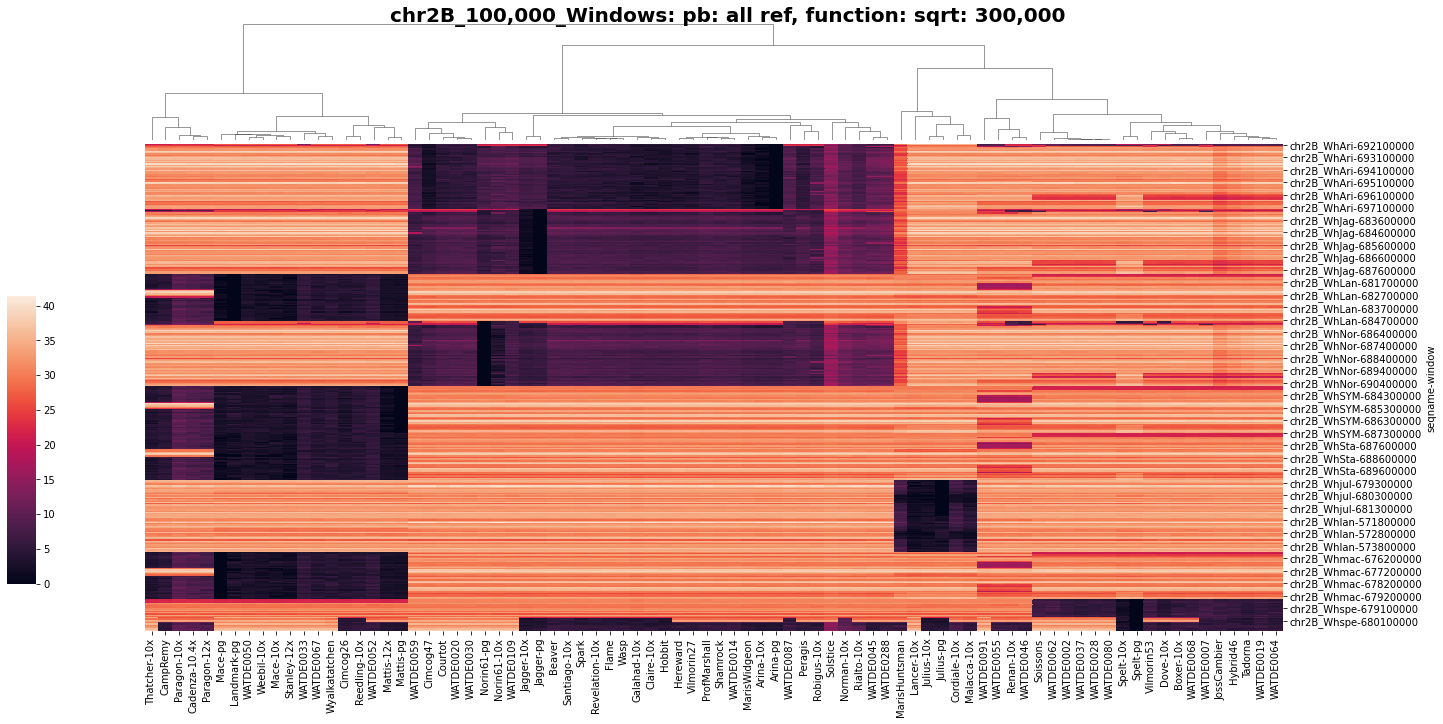

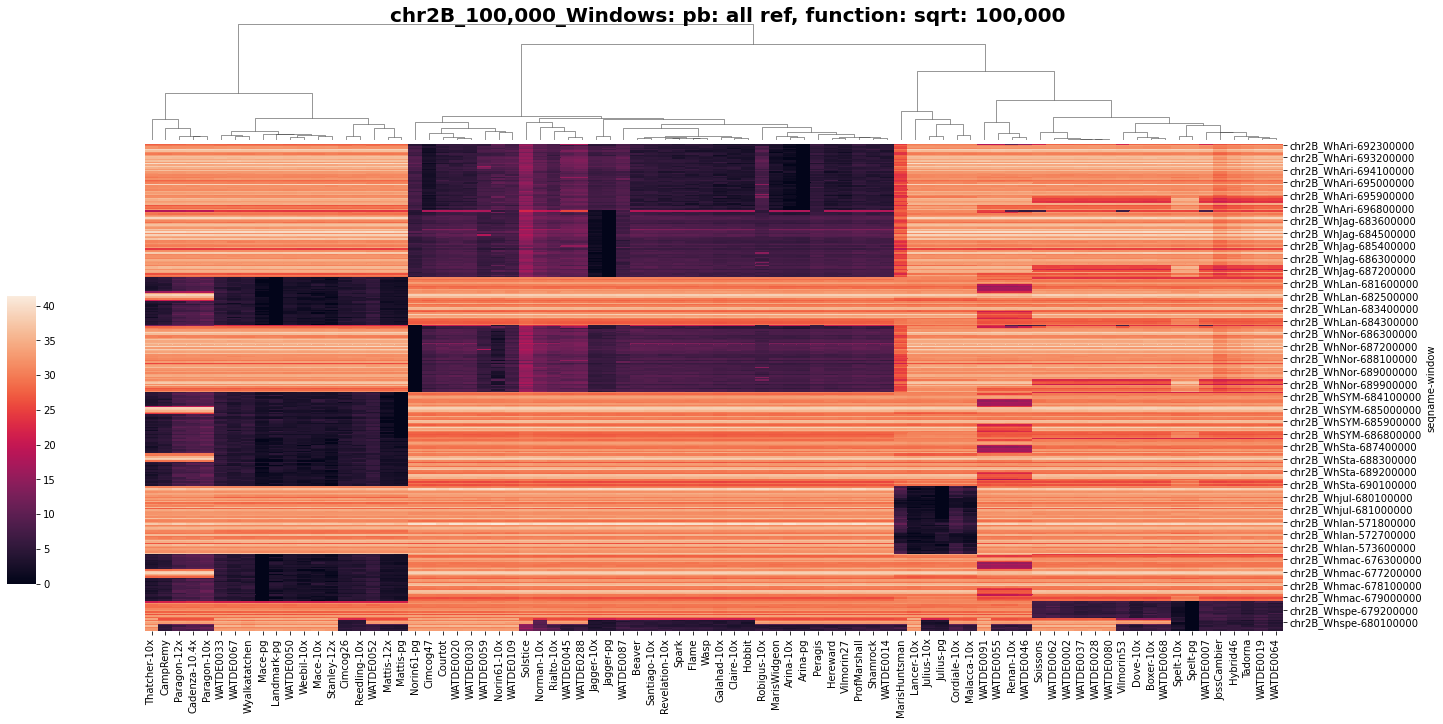

In [10]:
# combine dataframes from multiple references

buffers = [500000000, 100000000, 10000000, 5000000, 1000000, 600000, 300000, 100000]

for buffer in buffers:
    dfs = []
    for reference in references:

        down_gene_position = int(down_matched_gene[down_matched_gene['ref'] == reference]['start'].values)
        down_chromosome = down_matched_gene[down_matched_gene['ref'] == reference]['chr'].values[0]
        down_region = down_gene_position - buffer
        
        up_gene_position = int(up_matched_gene[up_matched_gene['ref'] == reference]['end'].values)
        up_chromosome = up_matched_gene[up_matched_gene['ref'] == reference]['chr'].values[0]
        up_region = up_gene_position + buffer

        file_db = pd.read_csv(f'{data_path}/{reference}_vs_all_variations_{window}_windows.tsv', delimiter='\t')

        # drop outlier samples
        file_db = file_db.drop(list_of_query, axis=1, errors='ignore')

        # find and extract gene region
        get_target_region_ = get_target_region(file_db, down_chromosome, down_region, up_region, function, power_n)

        dfs.append(get_target_region_)

    dfs_concat = pd.concat(dfs, join="inner")
    
#     buffer = str(buffer) + '_downstream only'
    heatmap_data = pd.pivot_table(dfs_concat, values=dfs_concat.columns, index=['seqname', 'window'])
    get_culstermap_ = get_culstermap(heatmap_data, False).fig.suptitle(f'{down_chromosome}_{window:,}_Windows: pb: all ref, function: {function_name}: {buffer:,}', fontsize=20, va="baseline", weight="bold")